# <strong>Analysing Spotify Song Data from 2019</strong>
<strong>In this project we will analyse the Spotify Data Collected from 2019. The dataset contains 8500+ tracks. 
We will visualise the different audio features against popularity to see which features have an effect on the likelihood that the song will be popular.</strong>

## 1. Importing Libraries and Dataset

Importing the Python libraries Numpy and Pandas

In [1]:
import pandas as pd
import numpy as np

Reading the saved CSV file containing the Spotify dataset

In [2]:
df=pd.read_csv('SpotifyAudioFeatures2019.csv')

Importing Bokeh libraries for some fancy visuals

In [3]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin

## 2. Exploratory Data Analysis and Visualisation

<strong>Creating a colour map of the different audio features in the dataset versus popularity</strong>

In [4]:
y = df['popularity']/df['popularity'].max()

def make2dplot(title,x,y):
    bins = hexbin(x, y, 0.06)
    p = figure(title=title+' CMap', tools="wheel_zoom,pan,reset",
           match_aspect=True, background_fill_color='#440154')
    p.yaxis.axis_label = "Popularity"
    p.xaxis.axis_label = title
    p.grid.visible = False
    p.hex_tile(q="q", r="r", size=0.1, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))
    return p

p1 = make2dplot('Danceability', df['danceability']/df['danceability'].max(), y)
p2 = make2dplot('Acousticness', df['acousticness']/df['acousticness'].max(), y)
p3 = make2dplot('Duration', df['duration_ms']/df['duration_ms'].max(), y)
p4 = make2dplot('Energy', df['energy']/df['energy'].max(), y)
p5 = make2dplot('Instrumentalness', df['instrumentalness']/df['instrumentalness'].max(), y)
p6 = make2dplot('Key', df['key']/df['key'].max(), y)
p7 = make2dplot('Valence', df['valence']/df['valence'].max(), y)
p8 = make2dplot('Liveness', df['liveness']/df['liveness'].max(), y)
p9 = make2dplot('Loudness', df['loudness']/df['loudness'].max(), y)
p10 = make2dplot('Speechiness', df['speechiness']/df['speechiness'].max(), y)
p11 = make2dplot('Tempo', df['tempo']/df['tempo'].max(), y)


output_notebook()

show(gridplot([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11], ncols=4, color='red', plot_width=200, plot_height=200, toolbar_location=None))

Loading BokehJS ...

## 3. Plotting Histograms - Audio Features of Hit Tracks vs Non-Hit Tracks
Writing a function for plotting histograms

In [5]:
def make_plot(title, hist, edges, x):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    p.y_range.start = 0
    p.legend.location = "center"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = ''
    p.grid.grid_line_color="white"
    return p

Plotting histograms for non-hit songs (Popularity < 40) 

In [6]:
import numpy as np

df1=df[df['popularity']<40]

hist1, edges1 = np.histogram(df1['danceability'], bins=20)
hist2, edges2 = np.histogram(df1['valence'], bins=20)
hist3, edges3 = np.histogram(df1['acousticness'], bins=20)
hist4, edges4 = np.histogram(df1['duration_ms'], bins=20)
hist5, edges5 = np.histogram(df1['energy'], bins=20)
hist6, edges6 = np.histogram(df1['instrumentalness'], bins=20)
hist7, edges7 = np.histogram(df1['key'], bins=12)
hist9, edges9 = np.histogram(df1['liveness'], bins=20)
hist10, edges10 = np.histogram(df1['loudness'], bins=20)
hist11, edges11 = np.histogram(df1['speechiness'], bins=20)
hist12, edges12 = np.histogram(df1['tempo'], bins=20)


x = df.index

p1 = make_plot("Danceability Distribution", hist1, edges1, x)
p2 = make_plot("Valence Distribution", hist2, edges2, x)
p3 = make_plot("Acousticness Distribution", hist3, edges3, x)
p4 = make_plot("Duration Distribution", hist4, edges4, x)
p5 = make_plot("Energy Distribution", hist5, edges5, x)
p6 = make_plot("Instrumental Distribution", hist6, edges6, x)
p7 = make_plot("Key Distribution", hist7, edges7, x)
p9 = make_plot("Liveness Distribution", hist9, edges9, x)
p10 = make_plot("Loudness Distribution", hist10, edges10, x)
p11 = make_plot("Speechiness Distribution", hist11, edges11, x)
p12 = make_plot("Tempo Distribution", hist12, edges12, x)


output_notebook()

show(gridplot([p1,p2,p3,p4,p5,p6,p7,p9,p10,p11,p12], ncols=4, plot_width=200, plot_height=200, toolbar_location=None))

Loading BokehJS ...

Plotting histograms of hit songs (Popularity >= 80)

In [7]:
df2=df[df['popularity']>=80]

hist1, edges1 = np.histogram(df2['danceability'], bins=20)
hist2, edges2 = np.histogram(df2['valence'], bins=20)
hist3, edges3 = np.histogram(df2['acousticness'], bins=20)
hist4, edges4 = np.histogram(df2['duration_ms'], bins=20)
hist5, edges5 = np.histogram(df2['energy'], bins=20)
hist6, edges6 = np.histogram(df2['instrumentalness'], bins=20)
hist7, edges7 = np.histogram(df2['key'], bins=12)
hist9, edges9 = np.histogram(df2['liveness'], bins=20)
hist10, edges10 = np.histogram(df2['loudness'], bins=20)
hist11, edges11 = np.histogram(df2['speechiness'], bins=20)
hist12, edges12 = np.histogram(df2['tempo'], bins=20)


x = df.index

p1 = make_plot("Danceability Distribution", hist1, edges1, x)
p2 = make_plot("Valence Distribution", hist2, edges2, x)
p3 = make_plot("Acousticness Distribution", hist3, edges3, x)
p4 = make_plot("Duration Distribution", hist4, edges4, x)
p5 = make_plot("Energy Distribution", hist5, edges5, x)
p6 = make_plot("Instrumental Distribution", hist6, edges6, x)
p7 = make_plot("Key Distribution", hist7, edges7, x)
p9 = make_plot("Liveness Distribution", hist9, edges9, x)
p10 = make_plot("Loudness Distribution", hist10, edges10, x)
p11 = make_plot("Speechiness Distribution", hist11, edges11, x)
p12 = make_plot("Tempo Distribution", hist12, edges12, x)


output_notebook()

show(gridplot([p1,p2,p3,p4,p5,p6,p7,p9,p10,p11,p12], ncols=4, color='red', plot_width=200, plot_height=200, toolbar_location=None))

Loading BokehJS ...

## 4. Pre-processing the Data for Modelling

Here, we will prepare the dataset for modelling and create a model for predicting whether a song will attain popularity or not. Threshold of popularity is kept at 55.

In [9]:
# Define our features 
features = df.iloc[:,5:18]
features.head()
features = features.drop(['mode','time_signature'],axis=1)

# Define our labels
labels = df['popularity']>55
labels=labels*1

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

Reducing the dimensionality of the dataset through Principal Component Analysis (PCA)

Text(0.5,0,'Principal Component #')

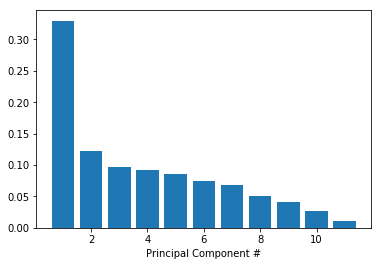

In [10]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(1,pca.n_components_+1),exp_variance)
ax.set_xlabel('Principal Component #')

Here, we can see in the scree plot that there is a clear elbow after the 1st component.
Though we will reduce the number of principal components to 10, we can also draw further PCA visualisations through the <strong>cumulative explained variance plot</strong> to determine how many features are required to explain, say, about 90% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb').

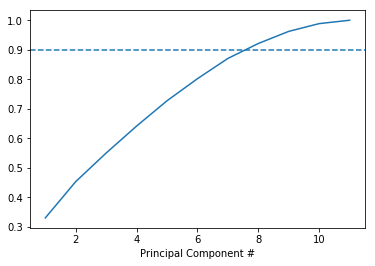

In [11]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(1,pca.n_components_+1),cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
ax.set_xlabel('Principal Component #')
n_components = 10

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

## 4. Modelling Popularity of Songs by Mining Audio Features

Here we create a model for predicting whether a song will achieve popularity or not. Threshold of popularity is kept at 55.

We will import the Scikit-Learn libraries for <strong>Logistic Regression and Random Forest </strong> and compare their performances.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

/home/salekali/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
from sklearn.model_selection import train_test_split

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,
                                                                            labels,
                                                                            test_size=0.25)

In [14]:
# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

In [15]:
# Train our Random Forest Regressor and predict labels for the test set
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
rf.fit(train_features, train_labels)
pred_labels_rf = rf.predict(test_features)

In [16]:
# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels,pred_labels_rf)
class_rep_log = classification_report(test_labels,pred_labels_logit)

print("Random Forest: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Random Forest: 
              precision    recall  f1-score   support

          0       0.66      0.82      0.73      1290
          1       0.56      0.36      0.44       836

avg / total       0.63      0.64      0.62      2126

Logistic Regression: 
              precision    recall  f1-score   support

          0       0.61      0.96      0.75      1290
          1       0.41      0.04      0.07       836

avg / total       0.53      0.60      0.48      2126



<strong>Here, we see that the Random Forest Classifier works much better than the Logistic Regression model. The logistic regression model is very harsh on the popular music and gives a much lower F1 score. </strong>